# Proyecto Final Clase Text Mining & Image Recognition

Integrantes:

* Jose Manuel Lara Rodas
* Leonel Eduardo Contreras González
* Luis Pedro Pérez Gutiérrez

## Problema 1 - Word Cloud:

Descargue el Dataset (de click aquı para descargar) el cual contiene aproximadamente 800,000 tweets de diversos temas. Usando CoLab y expresiones regulares. Determine los 3 usuarios mas populares dentro del dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:

* Content: Tweet.
* Metadata: ID, Timestamp, Length (este valor hay que calcularlo).

Posterior a tener sus 3 corpus creados, responda: ¿Razon por la que citan a ese usuario? para esto es necesario que extraiga el contexto de cada tweet y veriﬁque cuales son las palabras que mas rodean al nombre de usuario. Para extraer un contexto valido y debido a la naturaleza del tipo de datos que estan disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:

1. Remover stopwords.
2. Realizar stemming y lemmatizacion.
3. Mostrar un wordcloud con el top 10 para cada usuario.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se cargó el dataset a Google drive y se visualizó el contenido.

In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Proyecto_Text_mining/tweet_dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [3]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Asigna los encabezados al DataFrame

In [4]:
headers = ['Columna','ID', 'Timestamp', 'Query', 'Usuario', 'Tweets']
df.columns = headers

In [5]:
df['Length'] = df['Tweets'].apply(len)

In [6]:
df

,Columna,ID,Timestamp,Query,Usuario,Tweets,Length
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29
...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,78
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65


Se filtró los usuarios mas comentados en los tweets por medio de un regex

In [7]:
import re

mention_pattern = r'@(\w+)'

df['Mentions'] = df['Tweets'].apply(lambda x: re.findall(mention_pattern, x))
mention_counts = df['Mentions'].explode().value_counts()
top_3_users = mention_counts.head(3).index.tolist()

In [8]:
print(mention_counts)

mileycyrus        4500
tommcfly          3887
ddlovato          3467
DavidArchie       1299
Jonasbrothers     1287
                  ... 
GPDrometer           1
juicygirl21          1
PreMadonnaLana       1
LindseyBeckett       1
SpeakingUpH4H        1
Name: Mentions, Length: 356113, dtype: int64


Los usuarios más repetidos o más hablados en los tweets fueron de 'mileycyrus', 'tommcfly' y 'ddlovato'

In [9]:
print(top_3_users)

['mileycyrus', 'tommcfly', 'ddlovato']


In [10]:
df['Columna'].value_counts()/len(df)

4    0.5
0    0.5
Name: Columna, dtype: float64

Se llevo a cabo un corpus tomando únicamente el top 3 de los usuarios mas mencionados.  

In [11]:
Corpus1 = {}

for user in top_3_users:
    user_tweets = df[df['Mentions'].apply(lambda x: user in x)]
    user_tweets['Length'] = user_tweets['Tweets'].apply(len)

    # Crear un diccionario donde la clave es el nombre del usuario y el valor es el DataFrame correspondiente
    Corpus1[user] = user_tweets[['Tweets', 'ID', 'Timestamp', 'Length', 'Mentions']]

<ipython-input-11-3258a42daba4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Length'] = user_tweets['Tweets'].apply(len)
<ipython-input-11-3258a42daba4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Length'] = user_tweets['Tweets'].apply(len)
<ipython-input-11-3258a42daba4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [12]:
Corpus1

{'mileycyrus':                                                     Tweets          ID  \
 1020     @mileycyrus hahaha dont be like that one time ...  1468063101   
 2013     @mileycyrus i have the same problem, but it's ...  1468286517   
 2072     @mileycyrus I guess counting sheep didn't work...  1468297110   
 2079     @mileycyrus I would too if it meant spending a...  1468298918   
 2155     @mileycyrus AWWW u seriously have the cutest d...  1468318249   
 ...                                                    ...         ...   
 1595290  Hey @mileycyrus I voted for you at the teen ch...  2192336083   
 1596795  @mileycyrus http://twitpic.com/7f5fy - I love ...  2192768714   
 1597904  @mileycyrus i see the photos of your KISS iss ...  2193052811   
 1598347  @mileycyrus i am definitley definitley getting...  2193155701   
 1599234  @mileycyrus  well  hello miley  hows life as a...  2193400885   
 
                             Timestamp  Length      Mentions  
 1020     Mon Apr 06 

El corpus fue subdividido en tres acorde a los 3 usuarios mas comentados.

In [13]:
user1_df = Corpus1[top_3_users[0]]
user2_df = Corpus1[top_3_users[1]]
user3_df = Corpus1[top_3_users[2]]

In [14]:
user2_df

,Tweets,ID,Timestamp,Length,Mentions
1689,@tommcfly hey saw u guys play @ pushover..didn...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138,[tommcfly]
1788,@tommcfly Good morning Tom! Why can't I send y...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131,[tommcfly]
2513,@tommcfly did you know that johnsons baby use ...,1468391638,Tue Apr 07 01:23:07 PDT 2009,96,[tommcfly]
3028,"@dougiemcfly @tommcfly good morning guys, how ...",1468502040,Tue Apr 07 02:03:41 PDT 2009,108,"[dougiemcfly, tommcfly]"
3523,"@tommcfly hey, no chance of adding brighton or...",1468618787,Tue Apr 07 02:46:02 PDT 2009,131,[tommcfly]
...,...,...,...,...,...
1594945,@tommcfly you should record Star Girl with JB,2192269225,Tue Jun 16 06:46:41 PDT 2009,46,[tommcfly]
1595130,@tommcfly why you at the studio then? just wa...,2192311895,Tue Jun 16 06:50:40 PDT 2009,125,[tommcfly]
1595193,@tommcfly Gonna make a trip to England in the ...,2192315339,Tue Jun 16 06:50:59 PDT 2009,71,[tommcfly]
1597052,@tommcfly Heya Tom! You should follow Peter Fa...,2192836467,Tue Jun 16 07:37:16 PDT 2009,102,[tommcfly]


Utilizar una expresión regular para eliminar símbolos y puntos de los tweets

In [15]:
def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [16]:
user1_df['Tweets'] = user1_df['Tweets'].apply(clean_text)
user2_df['Tweets'] = user2_df['Tweets'].apply(clean_text)
user3_df['Tweets'] = user3_df['Tweets'].apply(clean_text)

<ipython-input-16-c659bedf8789>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user3_df['Tweets'] = user3_df['Tweets'].apply(clean_text)


In [17]:
user1_df

,Tweets,ID,Timestamp,Length,Mentions
1020,mileycyrus hahaha dont be like that one time i...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107,[mileycyrus]
2013,mileycyrus i have the same problem but its 443...,1468286517,Tue Apr 07 00:45:20 PDT 2009,137,[mileycyrus]
2072,mileycyrus I guess counting sheep didnt work ...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72,[mileycyrus]
2079,mileycyrus I would too if it meant spending a ...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100,[mileycyrus]
2155,mileycyrus AWWW u seriously have the cutest do...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112,[mileycyrus]
...,...,...,...,...,...
1595290,Hey mileycyrus I voted for you at the teen cho...,2192336083,Tue Jun 16 06:52:58 PDT 2009,104,[mileycyrus]
1596795,mileycyrus httptwitpiccom7f5fy I love you Mil...,2192768714,Tue Jun 16 07:31:21 PDT 2009,112,[mileycyrus]
1597904,mileycyrus i see the photos of your KISS iss b...,2193052811,Tue Jun 16 07:55:55 PDT 2009,74,[mileycyrus]
1598347,mileycyrus i am definitley definitley getting ...,2193155701,Tue Jun 16 08:04:20 PDT 2009,139,[mileycyrus]


In [18]:
user2_df

,Tweets,ID,Timestamp,Length,Mentions
1689,tommcfly hey saw u guys play pushoverdidnt ge...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138,[tommcfly]
1788,tommcfly Good morning Tom Why cant I send you ...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131,[tommcfly]
2513,tommcfly did you know that johnsons baby use a...,1468391638,Tue Apr 07 01:23:07 PDT 2009,96,[tommcfly]
3028,dougiemcfly tommcfly good morning guys how are...,1468502040,Tue Apr 07 02:03:41 PDT 2009,108,"[dougiemcfly, tommcfly]"
3523,tommcfly hey no chance of adding brighton or e...,1468618787,Tue Apr 07 02:46:02 PDT 2009,131,[tommcfly]
...,...,...,...,...,...
1594945,tommcfly you should record Star Girl with JB,2192269225,Tue Jun 16 06:46:41 PDT 2009,46,[tommcfly]
1595130,tommcfly why you at the studio then just watc...,2192311895,Tue Jun 16 06:50:40 PDT 2009,125,[tommcfly]
1595193,tommcfly Gonna make a trip to England in the h...,2192315339,Tue Jun 16 06:50:59 PDT 2009,71,[tommcfly]
1597052,tommcfly Heya Tom You should follow Peter Faci...,2192836467,Tue Jun 16 07:37:16 PDT 2009,102,[tommcfly]


In [19]:
user3_df

,Tweets,ID,Timestamp,Length,Mentions
459,ddlovato David_Henrie ummmmm i cant find it,1467929230,Mon Apr 06 22:51:34 PDT 2009,47,"[ddlovato, David_Henrie]"
572,ddlovato Do you hate us Please dont,1467953367,Mon Apr 06 22:58:30 PDT 2009,40,[ddlovato]
7031,ddlovato Wish that i could see it Thats the d...,1469661950,Tue Apr 07 07:02:58 PDT 2009,96,[ddlovato]
7088,ddlovato hey demi wen are you and selena gonna...,1469674492,Tue Apr 07 07:05:11 PDT 2009,79,[ddlovato]
8610,ddlovato ahhhh i wish i could go to the dallas...,1548280868,Fri Apr 17 20:31:31 PDT 2009,85,[ddlovato]
...,...,...,...,...,...
1592765,ddlovato hope to see you soon,2191807303,Tue Jun 16 06:00:23 PDT 2009,31,[ddlovato]
1593102,Fell asleep to chasecoy and woke up to ddlovat...,2191867976,Tue Jun 16 06:06:42 PDT 2009,82,"[chasecoy, ddlovato]"
1593329,ddlovato I VOTED cant wait,2191922960,Tue Jun 16 06:12:27 PDT 2009,36,[ddlovato]
1597790,FINALLY 15 TOMORROW And MirandaBuzz jennettemc...,2193009210,Tue Jun 16 07:52:11 PDT 2009,117,"[MirandaBuzz, jennettemccurdy, DanWarp, ddlova..."


## Normalización de texto

Se importaron las librerías y módulos

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from collections import Counter

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Se realizó una función con la librería nltk para llevar a cabo la tokenizacion, eliminación de stopwords, Stemming y lemmatization.

In [22]:
def preprocess_text(Tweets):
    tokens = nltk.word_tokenize(Tweets) # Tokenización

    stop_words = set(stopwords.words("english"))  # Eliminación de stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    stemmer = PorterStemmer()# Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    lemmatizer = WordNetLemmatizer()# Lemmatización
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    return ' '.join(lemmatized_tokens)# Devolver una cadena de texto limpia


In [23]:
user1_df['Preprocessed_Text'] = user1_df['Tweets'].apply(preprocess_text)
user2_df['Preprocessed_Text'] = user2_df['Tweets'].apply(preprocess_text)
user3_df['Preprocessed_Text'] = user3_df['Tweets'].apply(preprocess_text)

<ipython-input-23-b94997d762a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user3_df['Preprocessed_Text'] = user3_df['Tweets'].apply(preprocess_text)


In [24]:
user1_df

,Tweets,ID,Timestamp,Length,Mentions,Preprocessed_Text
1020,mileycyrus hahaha dont be like that one time i...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107,[mileycyrus],mileycyru hahaha dont like one time ny got 30 ...
2013,mileycyrus i have the same problem but its 443...,1468286517,Tue Apr 07 00:45:20 PDT 2009,137,[mileycyrus],mileycyru problem 443 let see count works12345...
2072,mileycyrus I guess counting sheep didnt work ...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72,[mileycyrus],mileycyru guess count sheep didnt work hope ge...
2079,mileycyrus I would too if it meant spending a ...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100,[mileycyrus],mileycyru would meant spend day heaven wmi mom...
2155,mileycyrus AWWW u seriously have the cutest do...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112,[mileycyrus],mileycyru awww u serious cutest dog miley sorr...
...,...,...,...,...,...,...
1595290,Hey mileycyrus I voted for you at the teen cho...,2192336083,Tue Jun 16 06:52:58 PDT 2009,104,[mileycyrus],hey mileycyru vote teen chois awardshop youll ...
1596795,mileycyrus httptwitpiccom7f5fy I love you Mil...,2192768714,Tue Jun 16 07:31:21 PDT 2009,112,[mileycyrus],mileycyru httptwitpiccom7f5fi love miley your ...
1597904,mileycyrus i see the photos of your KISS iss b...,2193052811,Tue Jun 16 07:55:55 PDT 2009,74,[mileycyrus],mileycyru see photo kiss i beauutiful romant
1598347,mileycyrus i am definitley definitley getting ...,2193155701,Tue Jun 16 08:04:20 PDT 2009,139,[mileycyrus],mileycyru definitley definitley get ticket con...


In [25]:
user2_df

,Tweets,ID,Timestamp,Length,Mentions,Preprocessed_Text
1689,tommcfly hey saw u guys play pushoverdidnt ge...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138,[tommcfly],tommcfli hey saw u guy play pushoverdidnt get ...
1788,tommcfly Good morning Tom Why cant I send you ...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131,[tommcfly],tommcfli good morn tom cant send messag short ...
2513,tommcfly did you know that johnsons baby use a...,1468391638,Tue Apr 07 01:23:07 PDT 2009,96,[tommcfly],tommcfli know johnson babi use anim like cute ...
3028,dougiemcfly tommcfly good morning guys how are...,1468502040,Tue Apr 07 02:03:41 PDT 2009,108,"[dougiemcfly, tommcfly]",dougiemcfli tommcfli good morn guy know frustr...
3523,tommcfly hey no chance of adding brighton or e...,1468618787,Tue Apr 07 02:46:02 PDT 2009,131,[tommcfly],tommcfli hey chanc ad brighton eastbourn ucap ...
...,...,...,...,...,...,...
1594945,tommcfly you should record Star Girl with JB,2192269225,Tue Jun 16 06:46:41 PDT 2009,46,[tommcfly],tommcfli record star girl jb
1595130,tommcfly why you at the studio then just watc...,2192311895,Tue Jun 16 06:50:40 PDT 2009,125,[tommcfly],tommcfli studio watch video guy jona brother l...
1595193,tommcfly Gonna make a trip to England in the h...,2192315339,Tue Jun 16 06:50:59 PDT 2009,71,[tommcfly],tommcfli gon na make trip england holiday im e...
1597052,tommcfly Heya Tom You should follow Peter Faci...,2192836467,Tue Jun 16 07:37:16 PDT 2009,102,[tommcfly],tommcfli heya tom follow peter facinelli twili...


In [26]:
user3_df

,Tweets,ID,Timestamp,Length,Mentions,Preprocessed_Text
459,ddlovato David_Henrie ummmmm i cant find it,1467929230,Mon Apr 06 22:51:34 PDT 2009,47,"[ddlovato, David_Henrie]",ddlovato david_henri ummmmm cant find
572,ddlovato Do you hate us Please dont,1467953367,Mon Apr 06 22:58:30 PDT 2009,40,[ddlovato],ddlovato hate u plea dont
7031,ddlovato Wish that i could see it Thats the d...,1469661950,Tue Apr 07 07:02:58 PDT 2009,96,[ddlovato],ddlovato wish could see that downsid live swed...
7088,ddlovato hey demi wen are you and selena gonna...,1469674492,Tue Apr 07 07:05:11 PDT 2009,79,[ddlovato],ddlovato hey demi wen selena gon na anoth vide...
8610,ddlovato ahhhh i wish i could go to the dallas...,1548280868,Fri Apr 17 20:31:31 PDT 2009,85,[ddlovato],ddlovato ahhhh wish could go dalla showbut won...
...,...,...,...,...,...,...
1592765,ddlovato hope to see you soon,2191807303,Tue Jun 16 06:00:23 PDT 2009,31,[ddlovato],ddlovato hope see soon
1593102,Fell asleep to chasecoy and woke up to ddlovat...,2191867976,Tue Jun 16 06:06:42 PDT 2009,82,"[chasecoy, ddlovato]",fell asleep chasecoy woke ddlovato go good day
1593329,ddlovato I VOTED cant wait,2191922960,Tue Jun 16 06:12:27 PDT 2009,36,[ddlovato],ddlovato vote cant wait
1597790,FINALLY 15 TOMORROW And MirandaBuzz jennettemc...,2193009210,Tue Jun 16 07:52:11 PDT 2009,117,"[MirandaBuzz, jennettemccurdy, DanWarp, ddlova...",final 15 tomorrow mirandabuzz jennettemccurdi ...


Se extrajeron únicamente los tweets de cada uno de los dataframe para crear 3 corpus.

In [27]:
corpus1 = user1_df['Preprocessed_Text']
corpus2 = user2_df['Preprocessed_Text']
corpus3 = user3_df['Preprocessed_Text']

In [28]:
corpus1

1020       mileycyru hahaha dont like one time ny got 30 ...
2013       mileycyru problem 443 let see count works12345...
2072       mileycyru guess count sheep didnt work hope ge...
2079       mileycyru would meant spend day heaven wmi mom...
2155       mileycyru awww u serious cutest dog miley sorr...
                                 ...                        
1595290    hey mileycyru vote teen chois awardshop youll ...
1596795    mileycyru httptwitpiccom7f5fi love miley your ...
1597904         mileycyru see photo kiss i beauutiful romant
1598347    mileycyru definitley definitley get ticket con...
1599234    mileycyru well hello miley how life big star d...
Name: Preprocessed_Text, Length: 4482, dtype: object

In [29]:
corpus2

1689       tommcfli hey saw u guy play pushoverdidnt get ...
1788       tommcfli good morn tom cant send messag short ...
2513       tommcfli know johnson babi use anim like cute ...
3028       dougiemcfli tommcfli good morn guy know frustr...
3523       tommcfli hey chanc ad brighton eastbourn ucap ...
                                 ...                        
1594945                         tommcfli record star girl jb
1595130    tommcfli studio watch video guy jona brother l...
1595193    tommcfli gon na make trip england holiday im e...
1597052    tommcfli heya tom follow peter facinelli twili...
1598417    fake tom fletcher crap tom_fletch that fakeit ...
Name: Preprocessed_Text, Length: 3881, dtype: object

In [30]:
corpus3

459                    ddlovato david_henri ummmmm cant find
572                                ddlovato hate u plea dont
7031       ddlovato wish could see that downsid live swed...
7088       ddlovato hey demi wen selena gon na anoth vide...
8610       ddlovato ahhhh wish could go dalla showbut won...
                                 ...                        
1592765                               ddlovato hope see soon
1593102       fell asleep chasecoy woke ddlovato go good day
1593329                              ddlovato vote cant wait
1597790    final 15 tomorrow mirandabuzz jennettemccurdi ...
1599255        ddlovato vote ive drawn pictur good keep draw
Name: Preprocessed_Text, Length: 3453, dtype: object

## Responder a la pregunta: ¿Razón por la que citan a ese usuario?

Primera forma:  Se realizó una función para las palabras que se suelen repetir con mas frecuencia.

In [51]:
from collections import Counter
from textblob import TextBlob

all_text1 = ' '.join(corpus1)
words = TextBlob(all_text1).words
word_counts = Counter(words)


print("Palabras más frecuentes:")
print(word_counts.most_common(50))

Palabras más frecuentes:
[('mileycyru', 4417), ('love', 931), ('miley', 838), ('u', 689), ('im', 569), ('vote', 452), ('good', 331), ('come', 321), ('cant', 303), ('hope', 300), ('go', 295), ('plea', 283), ('dont', 277), ('like', 253), ('see', 250), ('award', 227), ('your', 224), ('movi', 219), ('win', 206), ('want', 204), ('realli', 197), ('amaz', 197), ('best', 197), ('fan', 189), ('get', 186), ('know', 184), ('hey', 184), ('song', 183), ('ur', 176), ('time', 175), ('luck', 168), ('feel', 167), ('day', 166), ('wish', 161), ('look', 151), ('one', 149), ('na', 149), ('haha', 145), ('wait', 142), ('lol', 141), ('great', 139), ('much', 139), ('amp', 138), ('think', 137), ('make', 131), ('say', 131), ('that', 129), ('lt3', 128), ('life', 127), ('follow', 127)]


Gracias a las palabras que se lograron obtener las personas hacen tweets expresando amor, suerte, buenos deseos hacia Miley Cyrus. Que voten por ella en una nominación de premios. Y expresando que son grandes fans.

Se procedió a importar la librería matplotlib y WordCloud para graficar las palabras.

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
#pip install wordcloud matplotlib

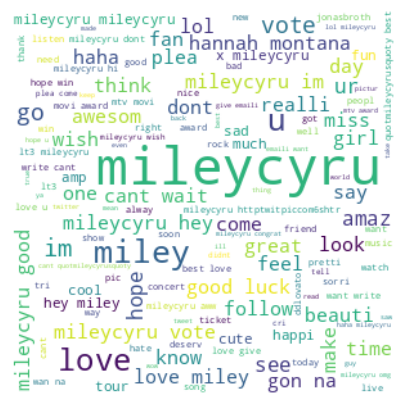

In [55]:
wordcloud1 = WordCloud(width=300, height=300, background_color="white").generate(all_text1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
all_text2 = ' '.join(corpus2)
words = TextBlob(all_text2).words
word_counts = Counter(words)

print("Palabras más frecuentes:")
print(word_counts.most_common(50))

Palabras más frecuentes:
[('tommcfli', 3877), ('tom', 687), ('love', 490), ('plea', 480), ('im', 454), ('u', 441), ('come', 347), ('say', 316), ('xx', 304), ('guy', 288), ('dont', 282), ('good', 273), ('x', 271), ('haha', 261), ('like', 257), ('back', 253), ('go', 247), ('repli', 246), ('fan', 228), ('see', 222), ('brazil', 222), ('plz', 221), ('get', 218), ('cant', 217), ('one', 207), ('miss', 205), ('day', 181), ('tweet', 181), ('hope', 180), ('show', 176), ('hi', 172), ('mcfli', 172), ('think', 170), ('know', 166), ('your', 165), ('want', 164), ('would', 162), ('realli', 160), ('hey', 158), ('time', 148), ('wait', 141), ('make', 139), ('lol', 138), ('na', 135), ('amaz', 125), ('could', 122), ('twitter', 121), ('much', 120), ('tour', 117), ('well', 112)]


Gracias a las palabras que se lograron obtener las personas hacen tweets de amor hacia tommcfli. Las personas piden que visite Brasil. Que realice un tour.

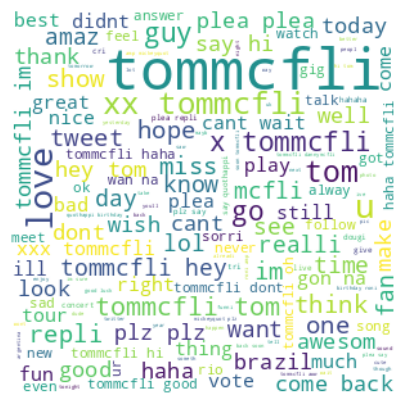

In [49]:
wordcloud2 = WordCloud(width=300, height=300, background_color="white").generate(all_text2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [53]:
all_text3 = ' '.join(corpus3)
words = TextBlob(all_text3).words
word_counts = Counter(words)

print("Palabras más frecuentes:")
print(word_counts.most_common(50))

Palabras más frecuentes:
[('ddlovato', 3451), ('love', 647), ('demi', 582), ('im', 517), ('u', 505), ('come', 345), ('go', 311), ('cant', 307), ('plea', 296), ('see', 271), ('wish', 256), ('hope', 252), ('wait', 233), ('like', 232), ('dont', 222), ('your', 206), ('good', 194), ('ur', 191), ('amaz', 189), ('want', 187), ('haha', 184), ('get', 173), ('realli', 163), ('would', 156), ('repli', 156), ('awesom', 156), ('could', 154), ('day', 153), ('know', 153), ('that', 148), ('song', 139), ('new', 138), ('one', 138), ('na', 132), ('back', 128), ('show', 126), ('concert', 121), ('think', 120), ('hey', 119), ('amp', 119), ('much', 115), ('album', 115), ('vote', 115), ('say', 113), ('make', 113), ('lt3', 113), ('feel', 110), ('lol', 109), ('fun', 109), ('ill', 106)]


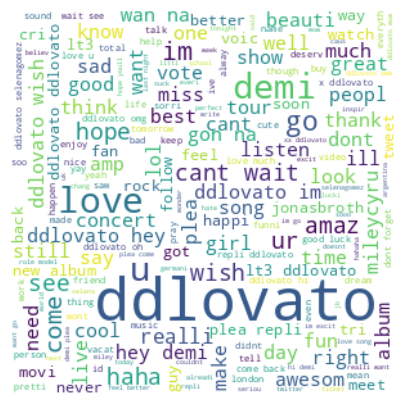

In [54]:
wordcloud3 = WordCloud(width=300, height=300, background_color="white").generate(all_text3)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.show()

Gracias a las palabras que se lograron obtener las personas hacen tweets de amor hacia Demi Lovato. Las personas quieren conocerla y piden escuchar que haga una nueva canción, álbum o concierto.

## Segunda forma:  Se realizó una función para hallar la cadena de texto u oraciones que más se suelen repetir.

In [34]:
user1_df['sentences'] = user1_df['Preprocessed_Text'].apply(lambda x: sent_tokenize(x))

all_sentences = [sentence for sublist in user1_df['sentences'] for sentence in sublist]

sentence_counts = Counter(all_sentences) #Calcula la frecuencia de oraciones
most_common_sentences = sentence_counts.most_common(10) #Oraciones mas frecuentes

for sentence, count in most_common_sentences:
    print(f"Oración: {sentence}")
    print(f"Frecuencia: {count}\n")

Oración: quotmileycyrusquoty best love give emaili want write cant
Frecuencia: 43

Oración: mileycyru vote
Frecuencia: 20

Oración: mileycyru
Frecuencia: 18

Oración: mileycyru littl back gave your amaz person miley never forget
Frecuencia: 18

Oración: mileycyru save life taught life lesson yet ive still never met yougotten repli love miley
Frecuencia: 12

Oración: mileycyru silli danc tryout friday amp find today made could wish luck amp pray plea
Frecuencia: 12

Oración: mileycyru good luck
Frecuencia: 12

Oración: mileycyru aj rafael awesom musician famou youtub cover song climb plea watch good httpbitly14si4m
Frecuencia: 9

Oración: quotmileycyrusquoty best love give email want write cant
Frecuencia: 8

Oración: mileycyru save life taught life lesson yet ive still never met yougotten repli love miley hero ââ
Frecuencia: 7



In [35]:
user2_df['sentences'] = user2_df['Preprocessed_Text'].apply(lambda x: sent_tokenize(x))

all_sentences = [sentence for sublist in user2_df['sentences'] for sentence in sublist]

sentence_counts = Counter(all_sentences)
most_common_sentences = sentence_counts.most_common(10)

for sentence, count in most_common_sentences:
    print(f"Oración: {sentence}")
    print(f"Frecuencia: {count}\n")

Oración: tommcfli plz say quothappi birthday roni amp mickeyquot plz plz plz
Frecuencia: 18

Oración: tommcfli plz say quothappi birthday roni amp mickeyquot plz plz plz x
Frecuencia: 18

Oración: difficult tommcfli could repli fan tweet jum
Frecuencia: 14

Oración: tommcfli tom need brazil come heard your back octob true xx
Frecuencia: 13

Oración: tommcfli hey tom say hi plea plea plea hand fall haha mom kill
Frecuencia: 11

Oración: tommcfli
Frecuencia: 10

Oración: tommcfli hi tom miss spoke portugues googl translat love much man plea answer need man xx
Frecuencia: 8

Oración: tommcfli plz say quothappi birthday roni amp mickeyquot plz plz plz xx
Frecuencia: 8

Oración: tommcfli tour mcfli brazil gone belo horizont almost kill knew would
Frecuencia: 7

Oración: tommcfli say hola mexicana plea plea juust wan na say hard ââ forget mexican fan
Frecuencia: 6



In [36]:
user3_df['sentences'] = user3_df['Preprocessed_Text'].apply(lambda x: sent_tokenize(x))

all_sentences = [sentence for sublist in user3_df['sentences'] for sentence in sublist]

sentence_counts = Counter(all_sentences)
most_common_sentences = sentence_counts.most_common(10)

for sentence, count in most_common_sentences:
    print(f"Oración: {sentence}")
    print(f"Frecuencia: {count}\n")

Oración: ddlovato aj rafael awesom musician famou youtub cover song dont forget plea watch good httpbitlyvfwa
Frecuencia: 19

Oración: ddlovato yesterday quotsonni chancequot came brazil love your amaz lt33 plea repli
Frecuencia: 11

Oración: ddlovato want fan want friend think that possibl plea repli back
Frecuencia: 11

Oración: ddlovato silli danc tryout friday find today made could wish luck amp pray plea
Frecuencia: 8

Oración: ddlovato wish
Frecuencia: 7

Oración: ddlovato awesom love draw hope youll ever see httptwitpiccom4lvn hope youll come holland soon
Frecuencia: 7

Oración: ddlovato demi perfect
Frecuencia: 6

Oración: ddlovato
Frecuencia: 5

Oración: ddlovato could plea get shout anyth im huge fan cant wait new cd
Frecuencia: 5

Oración: ddlovato hope im plane lol mean come life unfair im asia
Frecuencia: 4



<ipython-input-36-8840190d6cbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user3_df['sentences'] = user3_df['Preprocessed_Text'].apply(lambda x: sent_tokenize(x))
